# Malaria Diseased Cell Classification

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from random import shuffle
from tqdm import tqdm

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

#### Define path to database

In [3]:
cwd = os.getcwd()  #Get Path of Current Working Directory

infected_train_data = cwd + '/cell_images/Train/infected'
uninfected_train_data = cwd + '/cell_images/Train/uninfected'
infected_test_data = cwd + '/cell_images/Test/infected'
uninfected_test_data = cwd + '/cell_images/Test/uninfected'

#### Define Hyper-parameters

In [5]:
num_epochs = 50
size_batch = 50
alpha = 0.0001
validation_percentage = 0.3

In [6]:
def one_hot_label(img, label):
    if label == 0:
        ohl = np.array([1,0])
    elif label == 1:
        ohl = np.array([0,1])
    return ohl

def load_train_data():
    train_images = []
    
    label = 0  #For Infected Cells
#     print("Loading Training data for infected Cells")
    for i in tqdm(os.listdir(infected_train_data)):
        path = os.path.join(infected_train_data, i)
        try:
            img = cv2.imread(path)
            img = cv2.resize(img, (64,64))
        except:
            print("Error Loading this image: ", i) 
        train_images.append([np.array(img), one_hot_label(i, label)])
    
    label = 1 #For Uninfected
#     print("Loading Training data for uninfected Cells")
    for i in tqdm(os.listdir(uninfected_train_data)):
        path = os.path.join(uninfected_train_data, i)
        try:
            img = cv2.imread(path)
            img = cv2.resize(img, (64,64))
        except:
            print("Error Loading this image: ", i) 
        train_images.append([np.array(img), one_hot_label(i, label)])
    
    shuffle(train_images) #Shuffle data so every batch gets both, positives and negatives.
    shuffle(train_images) #Just to be sure Lol!
    return train_images

def load_test_data():
    test_images = []
    
    label = 0
#     print("Loading Test data for infected Cells")
    for i in tqdm(os.listdir(infected_test_data)):
        path = os.path.join(infected_test_data, i)
        try:
            img = cv2.imread(path)
            img = cv2.resize(img, (64,64))
        except:
            print("Error Loading this image: ", i)            
        test_images.append([np.array(img), one_hot_label(i, label)])
    
    label = 1
#     print("Loading Test data for uninfected Cells")
    for i in tqdm(os.listdir(uninfected_test_data)):
        path = os.path.join(uninfected_test_data, i)
        try:
            img = cv2.imread(path)
            img = cv2.resize(img, (64,64))
        except:
            print("Error Loading this image: ", i)
        test_images.append([np.array(img), one_hot_label(i, label)])
    return test_images   

In [7]:
training_images = load_train_data()
testing_images = load_test_data()

x_train = []
y_train = []

for k in training_images:
    x_train.append(k[0])
    y_train.append(k[1])

x_train = np.array(x_train)
y_train = np.array(y_train)

100%|██████████| 1000/1000 [00:01<00:00, 682.03it/s]


### Define Model

In [8]:
model = Sequential()

model.add(InputLayer(input_shape=[64,64,3]))
model.add(Conv2D(filters = 32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Conv2D(filters = 50, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Conv2D(filters = 80, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=5, padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))
optimizer = Adam(lr = alpha)


model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:


model.fit(x=x_train, y=y_train, validation_split = validation_percentage, epochs = num_epochs, batch_size = size_batch)

Instructions for updating:
Use tf.cast instead.
Train on 17890 samples, validate on 7668 samples
Epoch 1/50
17890/17890 [==============================] - 9s 497us/step - loss: 1.8143 - acc: 0.5528 - val_loss: 0.6367 - val_acc: 0.6617
Epoch 2/50
17890/17890 [==============================] - 7s 398us/step - loss: 0.6420 - acc: 0.6329 - val_loss: 0.5919 - val_acc: 0.6694
Epoch 3/50
17890/17890 [==============================] - 7s 393us/step - loss: 0.5694 - acc: 0.7027 - val_loss: 0.4977 - val_acc: 0.7664
Epoch 4/50
17890/17890 [==============================] - 7s 396us/step - loss: 0.5022 - acc: 0.7578 - val_loss: 0.5057 - val_acc: 0.7569
Epoch 5/50
17890/17890 [==============================] - 7s 398us/step - loss: 0.4382 - acc: 0.7951 - val_loss: 0.3546 - val_acc: 0.8430
Epoch 6/50
17890/17890 [==============================] - 7s 398us/step - loss: 0.3597 - acc: 0.8347 - val_loss: 0.2875 - val_acc: 0.8752
Epoch 7/50
17890/17890 [==============================] - 7s 404us/step - l

In [12]:
scores = model.evaluate(x_train, y_train, verbose = 0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 98.39%


#### Save Model

In [13]:
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model2.h5")
print("Saved Model as JSON file")

Saved Model as JSON file


### Run Predictions on a Test data which the model has never seen before

**1. These Cells are all Infected**

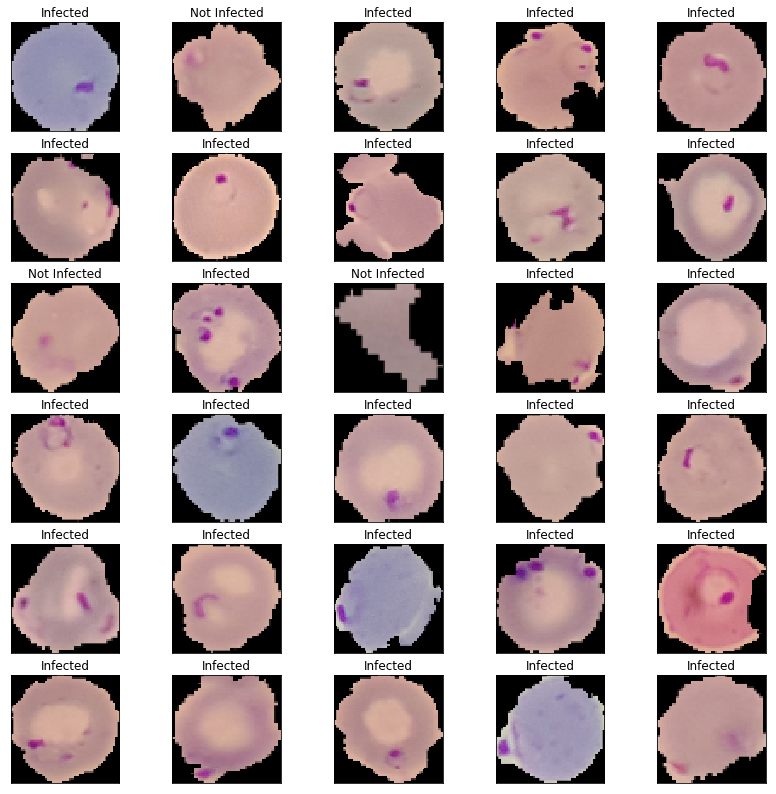

In [21]:
fig1 = plt.figure(figsize = (14,14))
for cnt, data in enumerate(testing_images[5:35]):
    y = fig1.add_subplot(6,5, cnt +1)
    img = data[0]
    data = img.reshape(1,64,64,3)
    model_out = model.predict([data])
    if np.argmax(model_out) == 1:
        str_label = 'Not Infected'
    else:
        str_label = 'Infected'
    
    y.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

**2. These are Uninfected Cells**

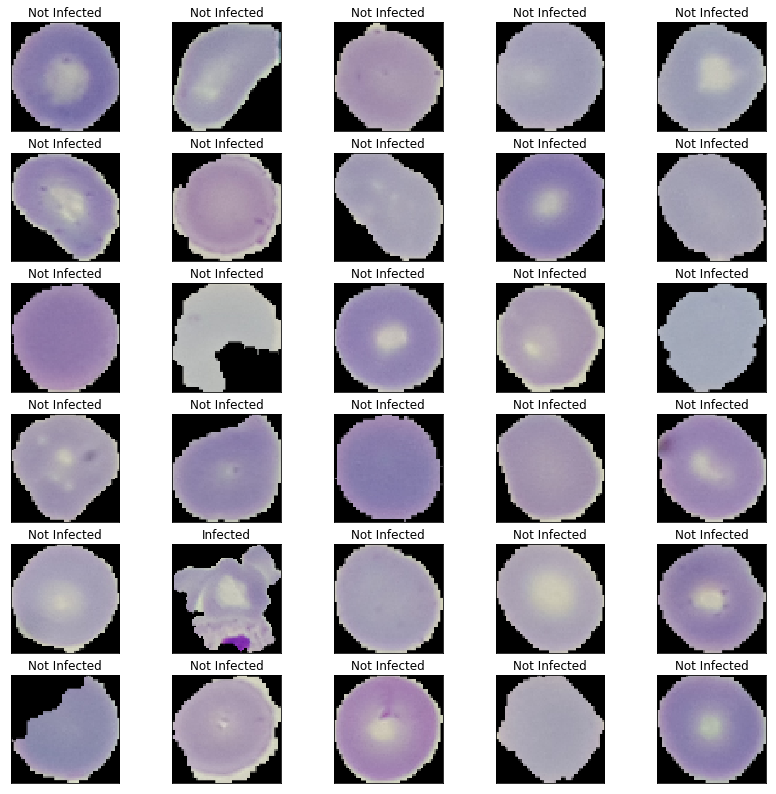

In [23]:
fig2 = plt.figure(figsize = (14,14))
for cnt, data in enumerate(testing_images[1005:1035]):
    y = fig2.add_subplot(6,5, cnt +1)
    img = data[0]
    data = img.reshape(1,64,64,3)
    model_out = model.predict([data])
    if np.argmax(model_out) == 1:
        str_label = 'Not Infected'
    else:
        str_label = 'Infected'
    
    y.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)